In [3]:
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [4]:
f = open("input.txt", "r")
lines = f.readlines()
distribution_name = lines[1].split(' ')[0]

# Figure 1
Medians (points) and interquartile ranges (vertical bars) of relative errors, $\eta$, of extrapolated extreme quantiles for different sample lengths. Results are grouped according to the return period.

In [5]:
# Import data set with 25th, 50th, and 75th percentile of errors for a sample length and a return period
quartiles_error = pyreadr.read_r("QuartilesErrors_%s.rds" %distribution_name)
quartiles_error = quartiles_error[None]
quartiles_error = pd.DataFrame(quartiles_error)

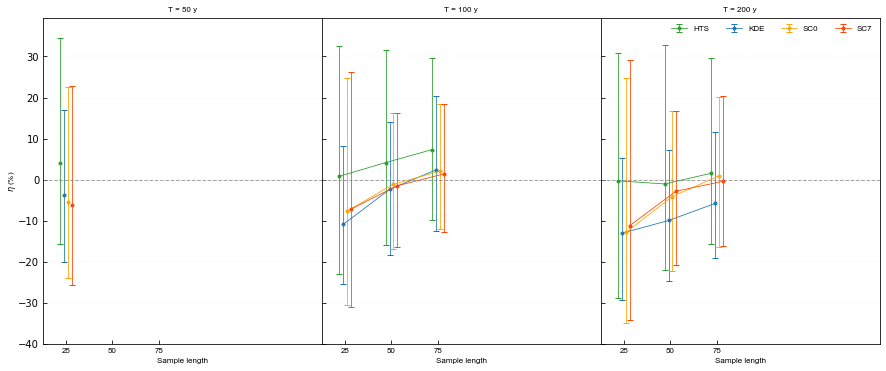

In [6]:
# Plot Figure 1
T_unique = list(set(quartiles_error['Return_period'].to_list()))
T_unique = np.floor(T_unique).astype(int)
T_unique.sort()
Meth_unique = list(set(quartiles_error['Method'].to_list()))
Meth_unique.sort()
L_unique = list(set(quartiles_error['Sample_length'].to_list()))
L_unique.sort()
L_unique = [str(round(x)) for x in L_unique]
x = np.arange(1, len(set(quartiles_error['Sample_length'].to_list())) + 1)
dx = np.array([-0.12, -0.04, 0.04, 0.12])
font = {'family': 'sans serif',
        'color':  'black',
        'fontname': 'Arial',
        'weight': 'normal',
        'size': 8,
        }
font_l = {'family':'Arial',
          'size':8}
cols = np.array(["tab:green", "tab:blue", "orange", "orangered"])
leg_name = ['HTS', 'KDE','SC0','SC7']

fig = plt.figure(figsize = (15, 6), constrained_layout = False)
gs = fig.add_gridspec(ncols = len(T_unique), nrows = 1, hspace = 0.05, wspace = 0) 
for column, tt in enumerate(T_unique):
    t_ax = fig.add_subplot(gs[0, column])
    t_ax.set_xlim([0.5, 6.5]) 
    t_ax.set_xticks(x)
    t_ax.tick_params(axis = 'x', direction = "in",length = 4)
    t_ax.tick_params(axis = 'y', direction = "in",length = 4)
    t_ax.plot([0.5, 6.5], [0, 0], '--', color = 'grey', alpha = 0.7, linewidth = 1, label = '_nolegend_') 
    t_ax.set_xlabel('Sample length', fontdict = font)       
    t_ax.set_ylim([min(quartiles_error['Q1_error']) - 5, max(quartiles_error['Q3_error']) + 5])
    t_ax.set_title('T = %d y' %tt, fontdict = font)
    t_ax.set_xticklabels(L_unique, fontdict = font)
    if column == 0:
        t_ax.set_ylabel('$\eta$ (%)', fontdict = font, labelpad = 0.001)
    else:
        t_ax.set_yticklabels([],fontdict=font)
    for ind, mm in enumerate(Meth_unique):
        tmp_df = quartiles_error[(quartiles_error['Return_period'] == tt) & (quartiles_error['Method'] == mm)]
        sorted_df = tmp_df.sort_values(by = ['Sample_length'])
        med_err = sorted_df[['Sample_length', 'Median_error']]
        lower_err = med_err['Median_error'] - sorted_df['Q1_error'].to_list()
        upper_err = sorted_df['Q3_error'].to_list() - med_err['Median_error']
        asymmetric_err = [lower_err, upper_err]
        t_ax.errorbar(x + dx[ind], med_err['Median_error'], yerr = asymmetric_err, fmt = '-o',capsize = 3, alpha = 1,
                      label = leg_name[ind], color = cols[ind], markersize = 3, linewidth = 0.8)
        t_ax.grid(axis = 'y', color = 'gainsboro', linestyle = '-', linewidth = 0.1)
t_ax.legend(ncol = 4, prop = font_l, frameon = False)             
fig.savefig("Figure1_%s.pdf" %distribution_name, bbox_inches = "tight")    

# Figure 2

Box plots of median errors, $\eta$, of extreme quantiles extrapolated from samples with a length equal to NN. Box plots are grouped by extrapolation technique and distribution.

In [7]:
# Import data set with quantiles and relative errors for each sample length and return period
quantiles = pyreadr.read_r("EstimatedQuantiles_and_Errors_%s.rds" %distribution_name)
quantiles = quantiles[None]
quantiles = pd.DataFrame(quantiles)
errors = pd.DataFrame(quantiles[['Sample_length', 'Return_period', 'HTS_error', 'KDE_error', 'SC0_error', 'SC7_error']])
errors = errors.dropna()

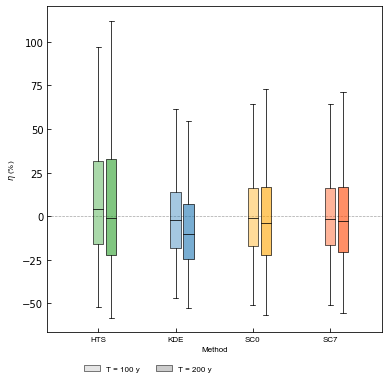

In [9]:
# Plot Figure 2
NN = 50 # change here if you want to plot boxplots for a different sample length
flierprops = dict(marker = 'o', markerfacecolor = 'grey', markersize = 1,
                  linestyle = 'none', markeredgecolor = 'grey')
medianprops = dict(linestyle = '-', linewidth = 0.5, color = 'black')
whiskerprops = dict(linestyle = '-', linewidth = 0.5, color = 'black')
capprops = dict(linestyle = '-', linewidth = 0.5)
l_w = 0.5 # box linewidth
transp = [0.2, 0.4, 0.6, 0.8, 1] # level of transparency
cols = np.array(["tab:green", "tab:blue", "orange", "orangered"])
leg_name = []
meth_name = errors.columns[2:6]
pos = [0, 6, 12, 18] 
x_lab = ['HTS', 'KDE', 'SC0', 'SC7']

fig = plt.figure(figsize = (6, 6), constrained_layout = False)
t_ax = fig.add_subplot()
t_ax.set_xlabel('Method', fontdict = font)
t_ax.set_ylabel('$\eta$ (%)', fontdict = font)
t_ax.tick_params(axis = 'x', direction = "in", length = 4)
t_ax.tick_params(axis = 'y', direction = "in", length = 4)
len_0 = len(T_unique)
ds = 5 - len(T_unique)
for ind_t, tt in enumerate(T_unique):        
    tmp = errors[(errors['Sample_length'] == NN) & (errors['Return_period'] == tt)]
    if tmp.empty == True:
        len_0 = len_0-1
    else:
        leg_name.append('T = %s y' %tt)
    for ind_m,mm in enumerate(meth_name): 
        t_ax.boxplot(tmp[mm], positions = [pos[ind_m] + ds], widths = 0.8, patch_artist = True,
                     boxprops = dict(linewidth = l_w, facecolor = cols[ind_m], alpha = transp[ind_t]),
                     whiskerprops = whiskerprops, showfliers = False, medianprops = medianprops, capprops = capprops)  
        t_ax.boxplot(tmp[mm], positions = [pos[ind_m] + ds], widths = 0.8, patch_artist = True,
                     boxprops = dict(linewidth = l_w, facecolor = 'none', alpha = 1), whiskerprops = whiskerprops,
                     showfliers = False, medianprops = medianprops, capprops = capprops)  
    ds = ds + 1
t_ax.set_xlim(-1, 25)
t_ax.set_xticks([3, 9, 15, 21])
t_ax.set_xticklabels(x_lab, fontdict = font)  
bp = [None] * len_0
for i in range(0, len_0):
    bp[i] = t_ax.boxplot(tmp['SC0_error'], positions = [-100], widths = 0.8, patch_artist = True, 
                         boxprops = dict(linewidth = l_w, facecolor = (0.5, 0.5, 0.5, transp[i])), 
                         showfliers = False, medianprops = medianprops)  
t_ax.plot([-1, 25], [0, 0], '--', color = 'grey', alpha = 0.7, linewidth = 0.7, label ='_nolegend_', zorder=0) 

legedend_elements = []
legended_names = []
for i in range(len_0):
    legedend_elements.append(bp[i]["boxes"][0])
    legended_names.append(leg_name[i])
t_ax.legend(handles = legedend_elements, labels = legended_names, loc = (0, -0.13),
            ncol = len_0, prop = font_l, frameon = False)
fig.savefig("Figure2_%s.pdf" %distribution_name, bbox_inches = "tight") 

# Figure 3
Box plots of estimated values of EVI for different sample lengths, grouped according to the distribution.

In [228]:
# Import data set with optimeized parameter (from KDE, SC0, adn SC7) for each sample length and return period
param = pyreadr.read_r("OptimumParameters_%s.rds" %distribution_name)
param = param[None]
param = pd.DataFrame(param)

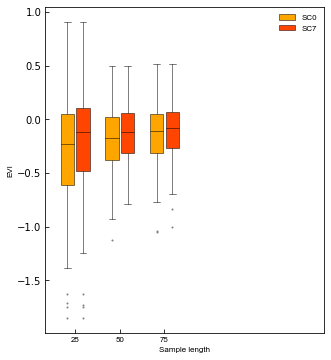

In [229]:
# Plot Figure 3
N_unique = list(set(param['Sample_length'].to_list()))
N_unique.sort()
leg_name = ['SC0', 'SC7']
x = [1.35, 3.35, 5.35, 7.35, 9.35, 11.35]
x = x[0:len(L_unique)]
eps = 2

fig = plt.figure(figsize = (5,6), constrained_layout = False)
t_ax = fig.add_subplot()
t_ax.set_xlabel('Sample length', fontdict = font)
t_ax.set_ylabel('EVI', fontdict = font)
t_ax.tick_params(axis = 'x', direction = "in",length = 4)
t_ax.tick_params(axis = 'y', direction = "in",length = 4)
aa=1    
for ind, nn in enumerate(N_unique):
    tmp=param[(param['Sample_length'] == nn)]
    EVI_0=np.array(tmp['SC0_EVI'].to_list())
    EVI_7=np.array(tmp['SC7_EVI'].to_list())
    bp1=t_ax.boxplot(EVI_0, positions = [aa], widths = 0.6, patch_artist = True, 
                     boxprops = dict(linewidth = l_w, facecolor = 'orange'), 
                     whiskerprops = whiskerprops, flierprops = flierprops,
                     medianprops = medianprops, capprops = capprops)  
    bp2=t_ax.boxplot(EVI_7, positions = [aa + 0.7], widths = 0.6, patch_artist = True,
                     boxprops = dict(linewidth = l_w, facecolor = 'orangered'),
                     whiskerprops = whiskerprops, flierprops = flierprops,
                     medianprops = medianprops, capprops = capprops)  
    t_ax.set_xlim(0, 12.5)
    t_ax.set_xticks(x)
    t_ax.set_xticklabels(L_unique, fontdict = font)  
    aa = aa + eps
t_ax.legend([bp1["boxes"][0], bp2["boxes"][0]], [leg_name[0], leg_name[1]], ncol = 1, frameon = False, prop = font_l)
fig.savefig("Figure3_%s.pdf" %distribution_name, bbox_inches = "tight")    

# Figure 4
Box plots of the optimized weight, $\omega$, of the mixture kernel in KDE method.

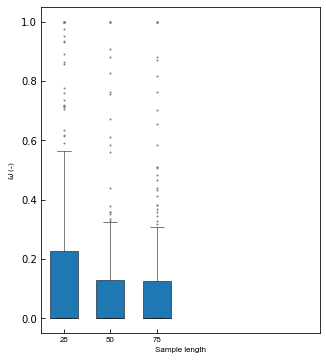

In [231]:
# Plot Figure 4
boxprops = dict(linewidth = l_w, facecolor = 'tab:blue')
x = [1, 2, 3, 4, 5, 6]
x = x[0:len(L_unique)]

fig = plt.figure(figsize = (5, 6), constrained_layout = False)
t_ax = fig.add_subplot()
w_T=[]   
for ind, nn in enumerate(N_unique):
    tmp = param[param['Sample_length'] == nn]
    w_T.append(tmp['HTS_w'].to_list())
t_ax.boxplot(w_T, widths = 0.6, patch_artist = True,boxprops = boxprops, 
             whiskerprops = whiskerprops, flierprops = flierprops,
             medianprops = medianprops, capprops = capprops)  
t_ax.tick_params(axis = 'y', direction = "in",length = 4)
t_ax.set_xticks(x)
t_ax.set_xlim(0.5, 6.5)
t_ax.set_xticklabels(L_unique, fontdict = font) 
t_ax.set_xlabel('Sample length', fontdict = font)
t_ax.set_ylabel('$\omega$ (-)', fontdict = font)
t_ax.tick_params(axis = 'x', direction = "in", length = 4)
t_ax.tick_params(axis = 'y', direction = "in", length = 4) 
fig.savefig("Figure4_%s.pdf" %distribution_name, bbox_inches = 'tight')        